# Problem 1 - Linear regression

In [30]:
#import all necessary packages
import pandas as pd
import numpy as np
#import os
#import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#I will use stats model to perform the regression
from statsmodels import api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime, date
import itertools

In [31]:
#Load the data, clean the data, split the data into response covariates and response variable
#disregard state, county, community, communityname string, fold and other data that contains a lot of missing values
#Load
communities = pd.read_csv('/Users/catherinexu/Documents/QUT/ML/Data/Q1/communities.csv')
#Clean out the given columns
communities = communities.drop(columns=[" state ", " county ", " community ", " communityname string ", " fold "], axis = 1)
communities = communities.replace("?", np.nan)
#Remove columns that contain "?"
communities = communities.dropna(axis = 'columns')
#Split
X = communities.drop(columns=[" ViolentCrimesPerPop "], axis = 1)
y = communities[' ViolentCrimesPerPop ']
#Separate data into training, validation and training sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size = 0.15, random_state=1)
#now split training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.15, random_state=1)

Text(0.5, 1.0, 'ViolentCrimes')

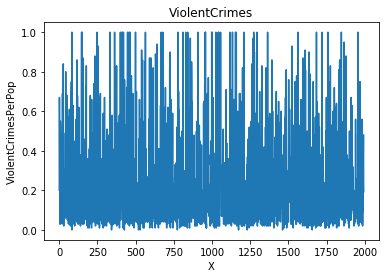

In [32]:
#Look at the data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(communities[' ViolentCrimesPerPop '])
ax.set_xlabel('X')
ax.set_ylabel('ViolentCrimesPerPop')
ax.set_title('ViolentCrimes')

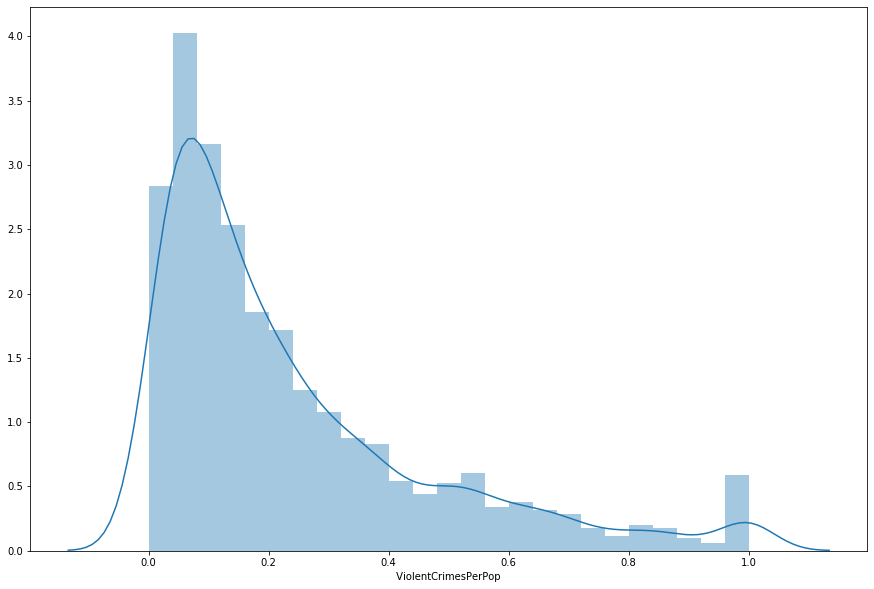

In [33]:
#Look at how the violentcrimesperpop is distributed
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(communities[' ViolentCrimesPerPop '])
#Observe that most of the value is between 0 and 0.6

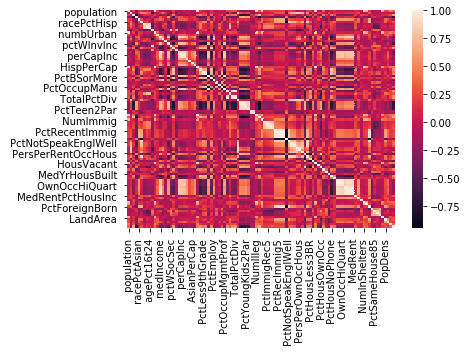

In [34]:
#Let's try to study a heat map
sns.heatmap(communities.corr())
#We do see that we have too many variables to actually see anything clearly. This is practicaly useless

In [35]:
#Build linear model
linear_model = LinearRegression()  
linear_model.fit(X_train, y_train)
#Study the coefficients from the model
coeff = pd.DataFrame(linear_model.coef_, X.columns, columns=['Coefficient'])  
coeff

,Coefficient
population,0.204987
householdsize,0.015681
racepctblack,0.215170
racePctWhite,-0.022614
racePctAsian,-0.013943
...,...
PctSameState85,0.010188
LandArea,0.041337
PopDens,-0.010055
PctUsePubTrans,-0.053982


In [36]:
#Let's predict the values and compare validation set with the predicted values
y_pred = linear_model.predict(X_test)
act_vs_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
act_vs_pred1 = act_vs_pred.head(25)
act_vs_pred
#I can see that the prediction isn't spot on, but most of the time it's prety close

,Actual,Predicted
1746,0.06,0.052482
1556,0.37,0.239081
56,0.22,0.230586
1740,0.01,0.052856
913,0.16,0.292754
...,...,...
428,0.71,0.181835
1933,0.03,0.064259
453,0.07,0.225187
1389,0.39,0.381687


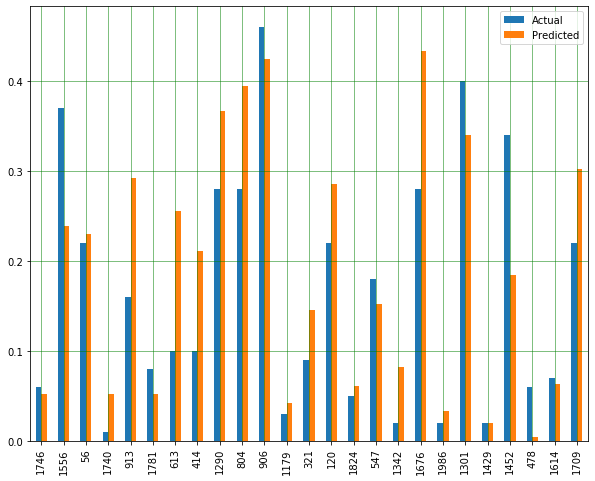

Text(0.5, 1.0, 'Testing Data')

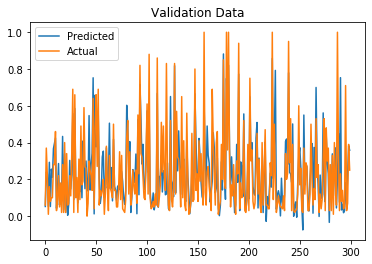

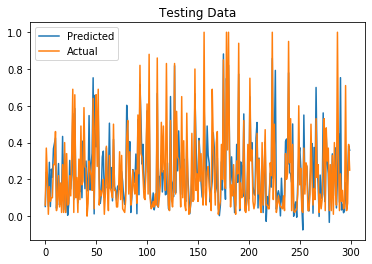

In [37]:
#plot the comparison and look at it graphical
act_vs_pred1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(linear_model.predict(X_val), label='Predicted')
ax.plot(y_val.to_numpy(), label='Actual')
ax.legend()
ax.set_title('Validation Data')
fig1 = plt.figure()
ax = fig1.add_subplot(1, 1, 1)
ax.plot(linear_model.predict(X_test), label='Predicted')
ax.plot(y_test.to_numpy(), label='Actual')
ax.legend()
ax.set_title('Testing Data')

# Problem 1 - Lasso regression

In [48]:
#Lasso regression = linear regressio with L1 normalisation
#Setting random_state a fixed value will guarantee that same sequence of random numbers are generated each time 
#you run the code. 
#Difference from Linear Regression is the penalty term, which in Lasso is sum of absolute values of coeff
#We do not add intercept
#We need to provide our own range og lambda, from here own attributed as alpha
#We store: r^2 of the learnt model, coefficients, train and val accuracies
r_2 = []
coeff = []
train_acc = []
val_acc = []
#try out some alphas/lambdas
alphas = np.arange(0.005, 1, 0.002)
for a in alphas:
    lasso_model = Lasso(fit_intercept = False, alpha = a).fit(X = X_train.to_numpy(), y = y_train.to_numpy())
    r_2.append(lasso_model.score(X = X_train.to_numpy(), y = y_train.to_numpy()))
    coeff.append(lasso_model.coef_)
    train_acc.append(np.sqrt(np.mean((lasso_model.predict(X_train.to_numpy())-y_train.to_numpy())**2)))
    val_acc.append(np.sqrt(np.mean((lasso_model.predict(X_val.to_numpy())-y_val.to_numpy())**2)))               

Text(0.5, 1.0, 'Alpha vs Coefficients')

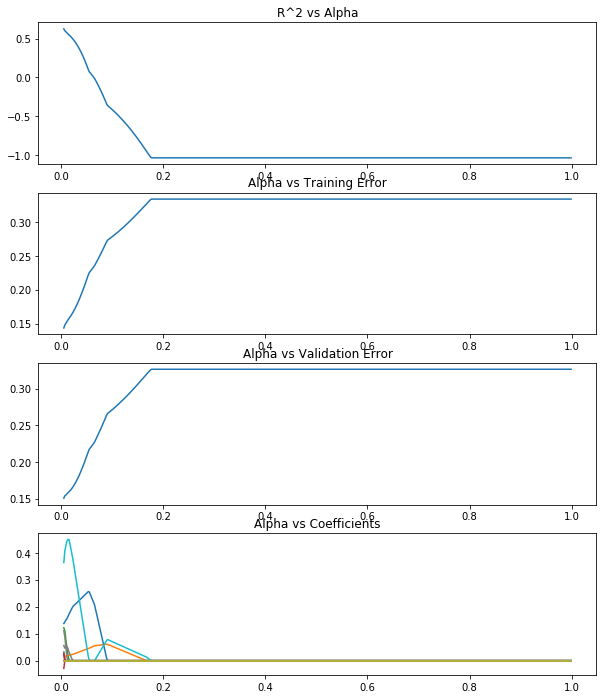

In [49]:
#Now we are going to do some plots to see how R^2 and train/val error developes as
#the value of lambda/alpha changes
fig = plt.figure(figsize =[10,12])
ax = fig.add_subplot(4,1,1)
ax.plot(alphas, r_2)
ax.set_title('R^2 vs Alpha')
ax = fig.add_subplot(4,1,2)
ax.plot(alphas, train_acc)
ax.set_title('Alpha vs Training Error')
ax = fig.add_subplot(4,1,3)
ax.plot(alphas, val_acc)
ax.set_title('Alpha vs Validation Error')
ax = fig.add_subplot(4,1,4)
ax.plot(alphas, coeff)
ax.set_title('Alpha vs Coefficients')

best lasso lambda
0.005


Text(0.5, 1.0, 'Testing Data')

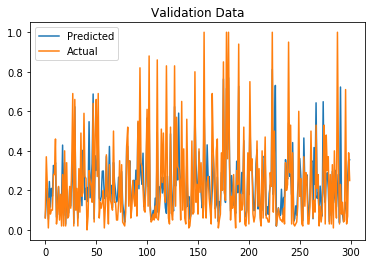

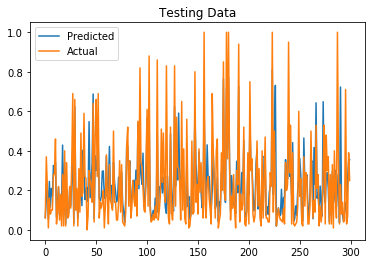

In [50]:
#Observations
#r^2 decreases as alpha increases
#training error increases
#validation error genereally increases, but is not the lowest alpha≈0
#most terms go to 0 pretty fast, however two are a bit slower
#We will pull out the best model
best_lasso_alpha = alphas[val_acc.index(min(val_acc))]
print("best lasso lambda")
print(best_lasso_alpha)
#use the best lasso model to fit the model
lasso_model = Lasso(fit_intercept = False, alpha = best_lasso_alpha).fit(X=X_train.to_numpy(), y=y_train.to_numpy())
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(lasso_model.predict(X_val), label='Predicted')
ax.plot(y_val.to_numpy(), label = 'Actual')
ax.legend()
ax.set_title('Validation Data')
fig1 = plt.figure()
ax = fig1.add_subplot(1,1,1)
ax.plot(lasso_model.predict(X_test), label = 'Predicted')
ax.plot(y_test.to_numpy(), label = 'Actual')
ax.legend()
ax.set_title('Testing Data')


# Problem 1 - Ridge regression

Text(0.5, 1.0, 'Alpha vs Coefficients')

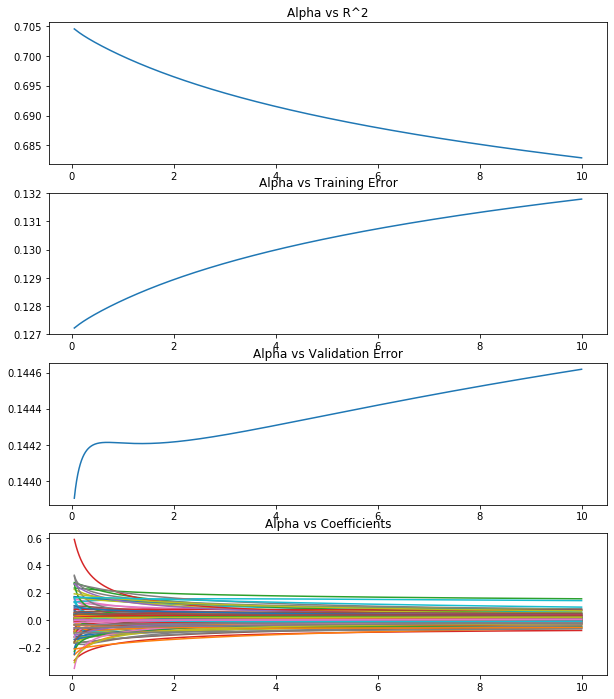

In [53]:
#Similar to Lasso, we introduce a penalty term, but this time L2
#Doing this pretty much the same way. Find lambda/alpha
alphas = np.arange(0.05, 10, 0.002)
r_2 = []
coeff = []
train_acc = []
val_acc = []
# compute ridge models, storing data as we did for Lasso
for a in alphas:
    ridge_model = Ridge(fit_intercept=False, alpha=a).fit(X = X_train.to_numpy(), y = y_train.to_numpy())
    r_2.append(ridge_model.score(X = X_train.to_numpy(), y = y_train.to_numpy()))
    coeff.append(ridge_model.coef_)
    train_acc.append(np.sqrt(np.mean((ridge_model.predict(X_train.to_numpy()) - y_train.to_numpy())**2)))
    val_acc.append(np.sqrt(np.mean((ridge_model.predict(X_val.to_numpy()) - y_val.to_numpy())**2)))
#Plot the alpas, R^', train/cval accuracies and coefficients
#to see how these values develop with different values of alpha
# plotting
fig = plt.figure(figsize=[10, 12])
ax = fig.add_subplot(4, 1, 1)
ax.plot(alphas, r_2)
ax.set_title('Alpha vs R^2')
ax = fig.add_subplot(4, 1, 2)
ax.plot(alphas, train_acc)
ax.set_title('Alpha vs Training Error')
ax = fig.add_subplot(4, 1, 3)
ax.plot(alphas, val_acc)
ax.set_title('Alpha vs Validation Error')
ax = fig.add_subplot(4, 1, 4)
ax.plot(alphas, coeff)
ax.set_title('Alpha vs Coefficients')


0.14390556930247217
0.05


Text(0.5, 1.0, 'Testing Data')

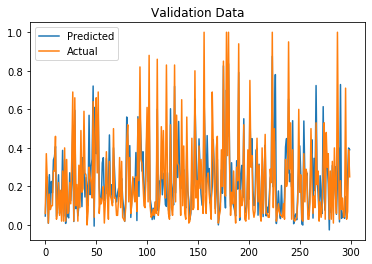

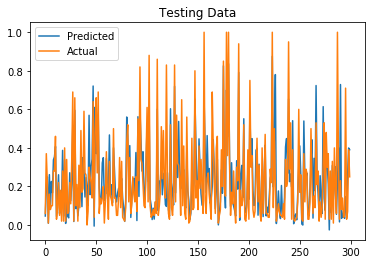

In [54]:
#This time around, it seems that we get the best performance
#with the lowest lambda
#We do not see the same pattern as with the val in lasso
#We will find the best alpha value and plot this
best_ridge_alpha = alphas[val_acc.index(min(val_acc))]
print(min(val_acc))
print(best_ridge_alpha)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(ridge_model.predict(X_val), label='Predicted')
ax.plot(y_val.to_numpy(), label='Actual')
ax.legend()
ax.set_title('Validation Data')
fig1 = plt.figure()
ax = fig1.add_subplot(1, 1, 1)
ax.plot(ridge_model.predict(X_test), label='Predicted')
ax.plot(y_test.to_numpy(), label='Actual')
ax.legend()
ax.set_title('Testing Data')


Text(0.5, 1.0, 'Testing Data')

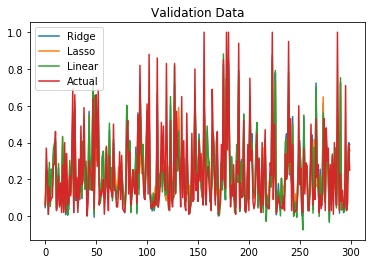

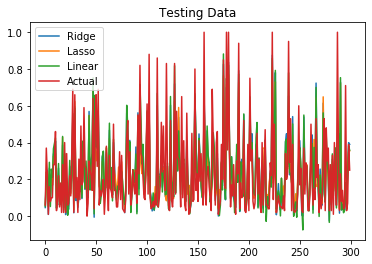

In [55]:
#Now let's study the three linear models side by side
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(ridge_model.predict(X_val), label='Ridge')
ax.plot(lasso_model.predict(X_val), label='Lasso')
ax.plot(linear_model.predict(X_val), label='Linear')
ax.plot(y_val.to_numpy(), label='Actual')
ax.legend()
ax.set_title('Validation Data')

fig1 = plt.figure()
ax = fig1.add_subplot(1, 1, 1)
ax.plot(ridge_model.predict(X_test), label='Ridge')
ax.plot(lasso_model.predict(X_test), label='Lasso')
ax.plot(linear_model.predict(X_test), label='Linear')
ax.plot(y_test.to_numpy(), label='Actual')
ax.legend()
ax.set_title('Testing Data')

In [56]:
#it is hard to see which model predicts the best
#let's study the RMSE, 
print('Linear Model, Test RMSE: ' + str(np.sqrt(np.mean((linear_model.predict(X_test.to_numpy()) - y_test.to_numpy())**2))))
print('Lasso Model, Test RMSE:  ' + str(np.sqrt(np.mean((lasso_model.predict(X_test.to_numpy()) - y_test.to_numpy())**2))))
print('Ridge Model, Test RMSE:  ' + str(np.sqrt(np.mean((ridge_model.predict(X_test.to_numpy()) - y_test.to_numpy())**2))))

Linear Model, Test RMSE: 0.14289323350782915
Lasso Model, Test RMSE:  0.1505618424614521
Ridge Model, Test RMSE:  0.14461805417027723


In [62]:
#based on these values, we can actually see that the Lasso regression predicts values with the lowest standard deviations
#Study R^2 as well
print('Linear Model, Test R^2: ' + str(r2_score(y_test.to_numpy(), linear_model.predict(X_test.to_numpy()))))
print('Lasso Model, Test R^2:  ' + str(r2_score(y_test.to_numpy(), lasso_model.predict(X_test.to_numpy()))))
print('Ridge Model, Test R^2:  ' + str(r2_score(y_test.to_numpy(), ridge_model.predict(X_test.to_numpy()))))


Linear Model, Test R^2: 0.6019091036783852
Lasso Model, Test R^2:  0.5580341029606346
Ridge Model, Test R^2:  0.5922406334524399
